In [1]:
import pandas as pd
import numpy as np
import matplotlib
# matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn
import math
import seaborn as sns
import os
from sklearn.manifold import MDS
from sklearn.metrics import pairwise_distances
from skbio.diversity import beta_diversity
from skbio.stats.ordination import pcoa

In [ ]:
! pip install open3d

In [52]:
import numpy as np
import open3d as o3d

# Assuming you have a NumPy array "point_cloud_data" with shape (N, 3)
# Replace this with your actual point cloud data
point_cloud_data = np.array([[1,2,3], [-1,-2,-3], [0,0,5]])

# Create an Open3D point cloud from the NumPy array
point_cloud = o3d.geometry.PointCloud()
point_cloud.points = o3d.utility.Vector3dVector(point_cloud_data)

# Estimate normals for the point cloud
point_cloud.estimate_normals(search_param=o3d.geometry.KDTreeSearchParamHybrid(radius=0.1, max_nn=30))

# Create a mesh from the point cloud using Poisson surface reconstruction
mesh, densities = o3d.geometry.TriangleMesh.create_from_point_cloud_poisson(point_cloud, depth=9)

# Refine the mesh to improve its quality
mesh = mesh.filter_smooth_taubin(number_of_iterations=10, lambda_param=0.5, mu_param=0.5)

# Visualize the mesh
o3d.visualization.draw_geometries([mesh])

ModuleNotFoundError: No module named 'open3d'

[[-1.         -1.         -1.        ]
 [-1.         -0.95918367 -1.        ]
 [-1.         -0.91836735 -1.        ]
 ...
 [ 1.          0.91836735  1.        ]
 [ 1.          0.95918367  1.        ]
 [ 1.          1.          1.        ]]


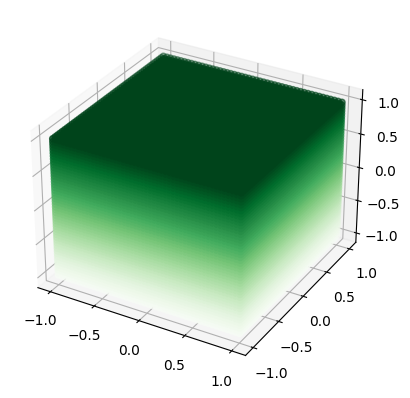

In [47]:
import numpy as np

def generate_unit_cube_mesh(n_points_per_dim):
    # Generate evenly spaced points along each dimension
    points = np.linspace(-1, 1, n_points_per_dim)
    
    # Create a mesh grid of points
    mesh_points = np.array(np.meshgrid(*[points, points, points])).T.reshape(-1, 3)
    
    return mesh_points

# Define the number of points per dimension
n_points_per_dim = 50

# Generate the unit cube mesh
unit_cube_mesh = generate_unit_cube_mesh(n_points_per_dim)

# Print the generated mesh points
print(unit_cube_mesh)

ax = plt.axes(projection='3d')

ax.scatter3D(unit_cube_mesh[:,0], unit_cube_mesh[:,1], unit_cube_mesh[:,2], c=unit_cube_mesh[:,2], cmap='Greens');


In [2]:
disease = ["IBD","CDI","autism", "RA", "T1D", "CRC", "EDD","HIV", "PAR", "OB", "NASH", "MHE", "ASD"]
disease_map = {"OB": ['ob_goodrich', 'ob_gordon_2008_v2', 'ob_ross', 'ob_zupancic'], "NASH": ['nash_chan', 'nash_ob_baker'], "MHE":['mhe_zhang'], "IBD":['ibd_alm','ibd_engstrand_maxee','ibd_gevers_2014','ibd_huttenhower']
               ,"CDI":['cdi_schubert', 'cdi_vincent_v3v5', 'cdi_youngster'],"autism":['autism_kb'], "RA":['ra_littman'],"T1D":['t1d_alkanani','t1d_mejialeon'],"CRC":['crc_baxter', 'crc_xiang', 'crc_zackular', 'crc_zeller', 'crc_zhao'],
               "EDD":['edd_singh'],"HIV":['hiv_dinh', 'hiv_lozupone', 'hiv_noguerajulian'], "PAR": ['par_scheperjans'], "ASD": ['asd_son']}
colors = ['r', 'g', 'b', 'm', 'c','y','k','lime','indigo','gold','olive','grey','royalblue','peru','orangered','skyblue','mistyrose', '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', 'b', 'g']
all_names = [x[:-8] for x in os.listdir("C:/Users/talno/microbiom_project/all_datasets/")]
data_map = dict()
for key, vals in disease_map.items():
    for val in vals:
        data_map[val] = key
indicates_columns = ['From', 'DiseaseState', 'State']
color_disease = {"IBD": 'b', "CDI": '#ff7f0e', "autism": '#2ca02c', "OB": 'k', 'CRC': 'springgreen', 'HIV': 'm', "EDD":'peru', "T1D": 'gold', "RA": 'indigo', "EDD": 'mistyrose', "PAR": 'skyblue', "NASH": 'red', "MHE": 'darkcyan', "ASD":'olive'}

In [3]:
genusHD = pd.read_csv('processed_data/HDdata_genus.csv').drop(columns=['Unnamed: 0'])
phylumHD = pd.read_csv('processed_data/HDdata_phylum.csv').drop(columns=['Unnamed: 0'])
genusA = pd.read_csv('processed_data/Adata_genus.csv').drop(columns=['Unnamed: 0'])
phylumA = pd.read_csv('processed_data/Adata_phylum.csv').drop(columns=['Unnamed: 0']) 

C:\Users\talno\AppData\Local\Temp\ipykernel_6412\1467980223.py:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  genusA = pd.read_csv('processed_data/Adata_genus.csv').drop(columns=['Unnamed: 0'])


In [4]:
genusA['From'] = 'A'
phylumA['From'] = 'A'
genusA['State'] = 'H'
phylumA['State'] = 'H'
genusA['DiseaseState'] = 'H'
phylumA['DiseaseState'] = 'H'

In [5]:
all_genus = pd.concat([genusHD, genusA], join='inner', ignore_index=True)
all_phylum = pd.concat([phylumHD, phylumA], join='inner', ignore_index=True)

In [6]:
all_genus = all_genus.loc[all_genus.sum(axis=1) != 0,all_genus.sum(axis=0) != 0]
all_phylum = all_phylum.loc[all_phylum.sum(axis=1) != 0,all_phylum.sum(axis=0) != 0]

C:\Users\talno\AppData\Local\Temp\ipykernel_6412\1201570349.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  all_genus = all_genus.loc[all_genus.sum(axis=1) != 0,all_genus.sum(axis=0) != 0]
C:\Users\talno\AppData\Local\Temp\ipykernel_6412\1201570349.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  all_phylum = all_phylum.loc[all_phylum.sum(axis=1) != 0,all_phylum.sum(axis=0) != 0]


In [7]:
genus_abundance_data = all_genus.drop(columns=indicates_columns)
genus_relative_abundance = genus_abundance_data.div(genus_abundance_data.sum(axis=1), axis=0)
genus_abundance_data_log = np.log1p(genus_abundance_data)

In [254]:
genus_relative_abundance.index = genus_relative_abundance.index.map(str)
pd.DataFrame(all_genus[all_genus['State'] == 'D'].index).to_csv('C:/Users/talno/microbiom_project/microbiome_dysbiosis/microbiome_dysbiosis/percentile_normalization/all_data_D.txt', sep='\t')
disease_samples = all_genus[all_genus['State'] == 'D'].index.values.tolist()
with open('C:/Users/talno/microbiom_project/microbiome_dysbiosis/microbiome_dysbiosis/percentile_normalization/all_data_D.txt', 'w') as fp:
    fp.write('\t'.join(disease_samples))
healthy_samples = all_genus[all_genus['State'] != 'D'].index.values.tolist()
with open('C:/Users/talno/microbiom_project/microbiome_dysbiosis/microbiome_dysbiosis/percentile_normalization/all_data_H.txt', 'w') as fp:
    fp.write('\t'.join(healthy_samples))

In [253]:
genus_relative_abundance.to_csv('C:/Users/talno/microbiom_project/microbiome_dysbiosis/microbiome_dysbiosis/percentile_normalization/all_data.txt', sep='\t')



In [153]:
phylum_abundance_data = all_phylum.drop(columns=indicates_columns)
phylum_relative_abundance = phylum_abundance_data.div(phylum_abundance_data.sum(axis=1), axis=0)
phylum_abundance_data_log = np.log1p(phylum_abundance_data)

In [8]:
genus_relative_abundance2 = pd.read_csv('C:/Users/talno/microbiom_project/microbiome_dysbiosis/microbiome_dysbiosis/percentile_normalization/all_data_norm.txt', sep='\t').set_index('Unnamed: 0')
genus_relative_abundance2 = genus_relative_abundance2.div(genus_relative_abundance2.sum(axis=1), axis=0)

In [9]:
from combat.pycombat import pycombat
import pandas as pd
import matplotlib.pyplot as plt
corrected_df = pycombat(genus_abundance_data.transpose(), all_genus['From']).transpose()
corrected_df_log = pycombat(genus_abundance_data_log.transpose(), all_genus['From']).transpose()

# visualise results
# plt.boxplot(corrected_df)
# plt.show()

Found 30 batches.
Adjusting for 0 covariate(s) or covariate level(s).
Standardizing Data across genes.
Fitting L/S model and finding priors.
Finding parametric adjustments.
Adjusting the Data


c:\Users\talno\AppData\Local\Programs\Python\Python39\lib\site-packages\combat\pycombat.py:166: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  adjust = np.asarray([g_new, d_new])
c:\Users\talno\AppData\Local\Programs\Python\Python39\lib\site-packages\combat\pycombat.py:162: RuntimeWarning: divide by zero encountered in divide
  np.absolute(d_new-d_old)/d_old))  # maximum difference between new and old estimate


Found 30 batches.
Adjusting for 0 covariate(s) or covariate level(s).
Standardizing Data across genes.
Fitting L/S model and finding priors.
Finding parametric adjustments.
Adjusting the Data


c:\Users\talno\AppData\Local\Programs\Python\Python39\lib\site-packages\combat\pycombat.py:166: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  adjust = np.asarray([g_new, d_new])
c:\Users\talno\AppData\Local\Programs\Python\Python39\lib\site-packages\combat\pycombat.py:162: RuntimeWarning: divide by zero encountered in divide
  np.absolute(d_new-d_old)/d_old))  # maximum difference between new and old estimate


In [10]:
def PC(feature_table, pca=True):
    if not pca:
        distance_table = beta_diversity("braycurtis", feature_table, list(feature_table.index))
        components = pcoa(distance_table)
        pcoa_comp = components.samples.loc[:4974, ['PC1','PC2']]
        print("explained variance: ", components.proportion_explained[:2]*100)
        return pcoa_comp
    else:
        pca = PCA(n_components=2)
        pca.fit(feature_table)
        components = pca.transform(feature_table)
        pca_comp = pd.DataFrame(data= components[:], columns= ['PC1', 'PC2'])
        loadings = pca.components_[:2].T
        tops = (loadings ** 2).sum(axis=1).argsort()[-10:]
        loadings = loadings[tops]
        print("explained variance: ", pca.explained_variance_ratio_*100)
        return pca_comp, loadings, tops

In [11]:
components_log, loadings_log, tops_log = PC(corrected_df_log)
components, loadings, tops = PC(corrected_df) 
components_r, loadings_r, tops_r = PC(genus_relative_abundance2) 

explained variance:  [18.17996791  6.92159039]
explained variance:  [52.42082482 12.63843089]
explained variance:  [3.25695307 2.2005747 ]


In [16]:
def plot_pca(components, data,ax=None, loadings=None, tops=None, arrow=True, pca=True, show=all_names, w=0.03):
    polar_data = dict()
    ax.set_xlabel('PC1 ', fontsize=20)
    ax.set_ylabel('PC2 ', fontsize=20)
    if pca:
        ax.set_title("Principal Component Analysis",fontsize=20)
    else:
        ax.set_title("Principal Coordinates Analysis",fontsize=20)
    arrows, var_x, var_y, angles, sizes = dict(), [], [], [], []
    for target, color in zip(all_names,colors):
        arrows[target] = list()
        indicesToKeep = (data['From'] == target) & (data['State'] == 'H')
        x = components.loc[indicesToKeep.values, 'PC1'].values.mean()
        y = components.loc[indicesToKeep.values, 'PC2'].values.mean()
        arrows[target].append(x)
        arrows[target].append(y)
        if not arrow:
            if target in show:
                ax.scatter(components.loc[indicesToKeep.values, 'PC1'] , components.loc[indicesToKeep.values, 'PC2'], c='none', edgecolors=color, s=50)
        
        indicesToKeep = (data['From'] == target) & (data['State'] == 'D')
        x = components.loc[indicesToKeep.values, 'PC1'].values.mean()
        y = components.loc[indicesToKeep.values, 'PC2'].values.mean()
        arrows[target].append(x)
        arrows[target].append(y)
        if not arrow:
            if target in show:
                ax.scatter(components.loc[indicesToKeep.values, 'PC1'] , components.loc[indicesToKeep.values, 'PC2'], c=color, edgecolors=color, s=50)
    # find centroids and plotting an arrow

    for (name, (x1,y1,x2,y2)), color in zip(arrows.items(), colors):
        if arrow:
            ax.arrow(x1, y1, x2-x1,y2-y1, color=color_disease[data_map[name]], width = w)
            # plt.arrow(x1, y1, x2-x1,y2-y1, color=color, width = 0.005)     
        angles.append(math.atan2(y2-y1, x2-x1))
        sizes.append(math.sqrt((x2-x1)**2+(y2-y1)**2))
    if arrow:
        plt.legend(all_names, bbox_to_anchor=(1., 0., 0.6, 1.)) 
    else:
        plt.legend(np.repeat(show, 2), bbox_to_anchor=(0.7, 0., 0.9, 1.)) 
    # return angles, sizes
    if pca:
        for (i, arrow), index in zip(enumerate(loadings[-5:]),tops):
            ax.arrow(0, 0, *arrow, color='k', alpha=0.5, ec='none',
              length_includes_head=True)
            ax.text(*(arrow * 1.0), data.columns[index]+'_'+str(5-i),
             ha='center', va='center')
    return angles, sizes

In [13]:
%matplotlib inline
def plot_pca(components, data, loadings=None, tops=None, arrow=True, pca=True, show=all_names, w=0.03):
    plt.figure(figsize=(10,10))
    polar_data = dict()
    plt.xlabel('PC1 ', fontsize=20)
    plt.ylabel('PC2 ', fontsize=20)
    if pca:
        plt.title("Principal Component Analysis",fontsize=20)
    else:
        plt.title("Principal Coordinates Analysis",fontsize=20)
    arrows, var_x, var_y, angles, sizes = dict(), [], [], [], []
    for target, color in zip(all_names,colors):
        arrows[target] = list()
        indicesToKeep = (data['From'] == target) & (data['State'] == 'H')
        x = components.loc[indicesToKeep.values, 'PC1'].values.mean()
        y = components.loc[indicesToKeep.values, 'PC2'].values.mean()
        arrows[target].append(x)
        arrows[target].append(y)
        if not arrow:
            if target in show:
                plt.scatter(components.loc[indicesToKeep.values, 'PC1'] , components.loc[indicesToKeep.values, 'PC2'], c='none', edgecolors=color, s=50)
        
        indicesToKeep = (data['From'] == target) & (data['State'] == 'D')
        x = components.loc[indicesToKeep.values, 'PC1'].values.mean()
        y = components.loc[indicesToKeep.values, 'PC2'].values.mean()
        arrows[target].append(x)
        arrows[target].append(y)
        if not arrow:
            if target in show:
                plt.scatter(components.loc[indicesToKeep.values, 'PC1'] , components.loc[indicesToKeep.values, 'PC2'], c=color, edgecolors=color, s=50)
    # find centroids and plotting an arrow

    for (name, (x1,y1,x2,y2)), color in zip(arrows.items(), colors):
        if arrow:
            plt.arrow(x1, y1, x2-x1,y2-y1, color=color_disease[data_map[name]], width = w)
            # plt.arrow(x1, y1, x2-x1,y2-y1, color=color, width = 0.005)     
        angles.append(math.atan2(y2-y1, x2-x1))
        sizes.append(math.sqrt((x2-x1)**2+(y2-y1)**2))
    if arrow:
        plt.legend(all_names, bbox_to_anchor=(1., 0., 0.6, 1.)) 
    else:
        plt.legend(np.repeat(show, 2), bbox_to_anchor=(0.7, 0., 0.9, 1.)) 
    # return angles, sizes
    if pca:
        for (i, arrow), index in zip(enumerate(loadings[-5:]),tops):
            plt.arrow(0, 0, *arrow, color='k', alpha=0.5, ec='none',
              length_includes_head=True)
            plt.text(*(arrow * 1.0), data.columns[index]+'_'+str(5-i),
             ha='center', va='center')
    return angles, sizes

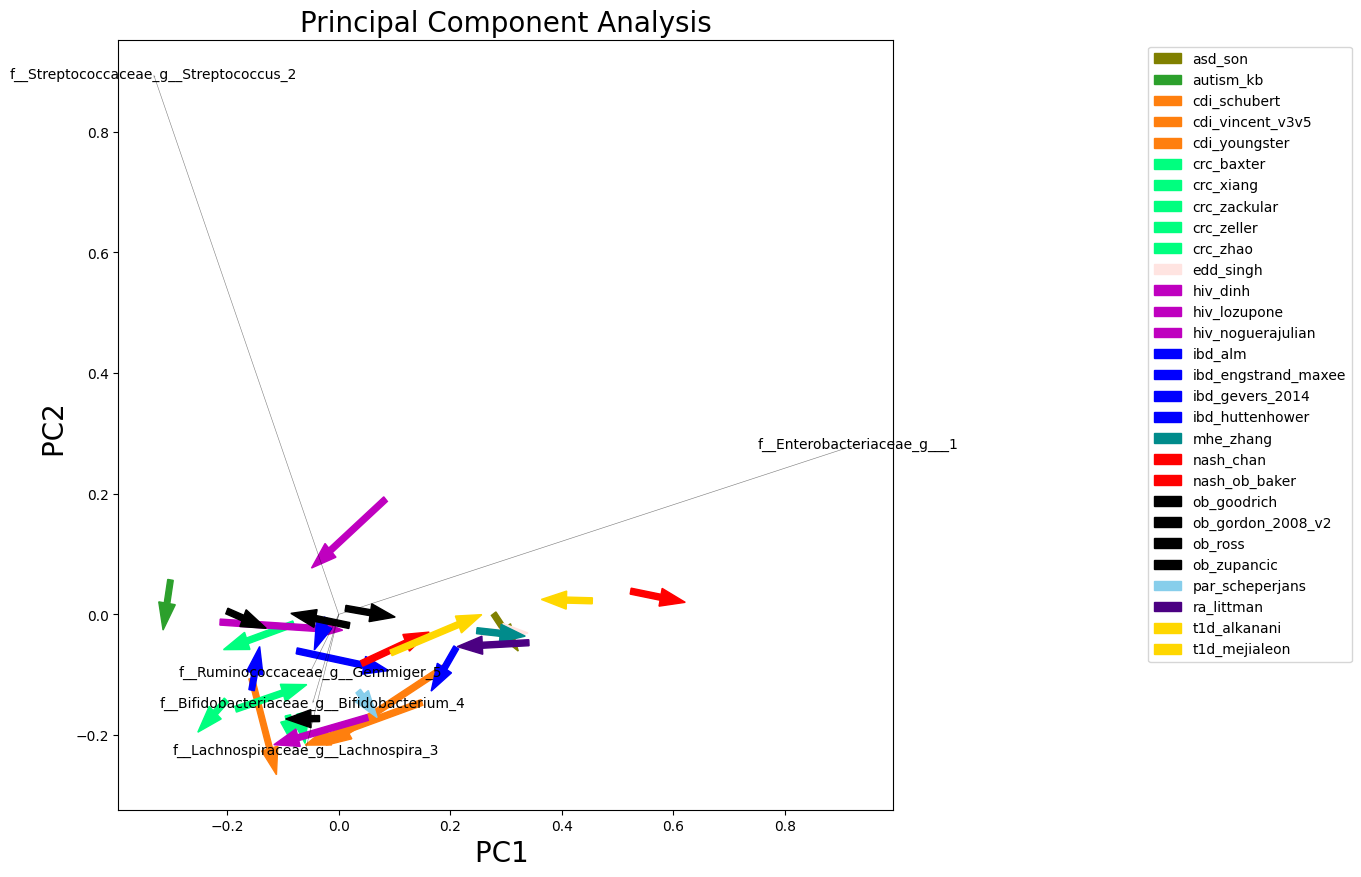

In [166]:
polar_data_ra = plot_pca(components_r, all_genus ,loadings_r, tops_r, w=0.01)

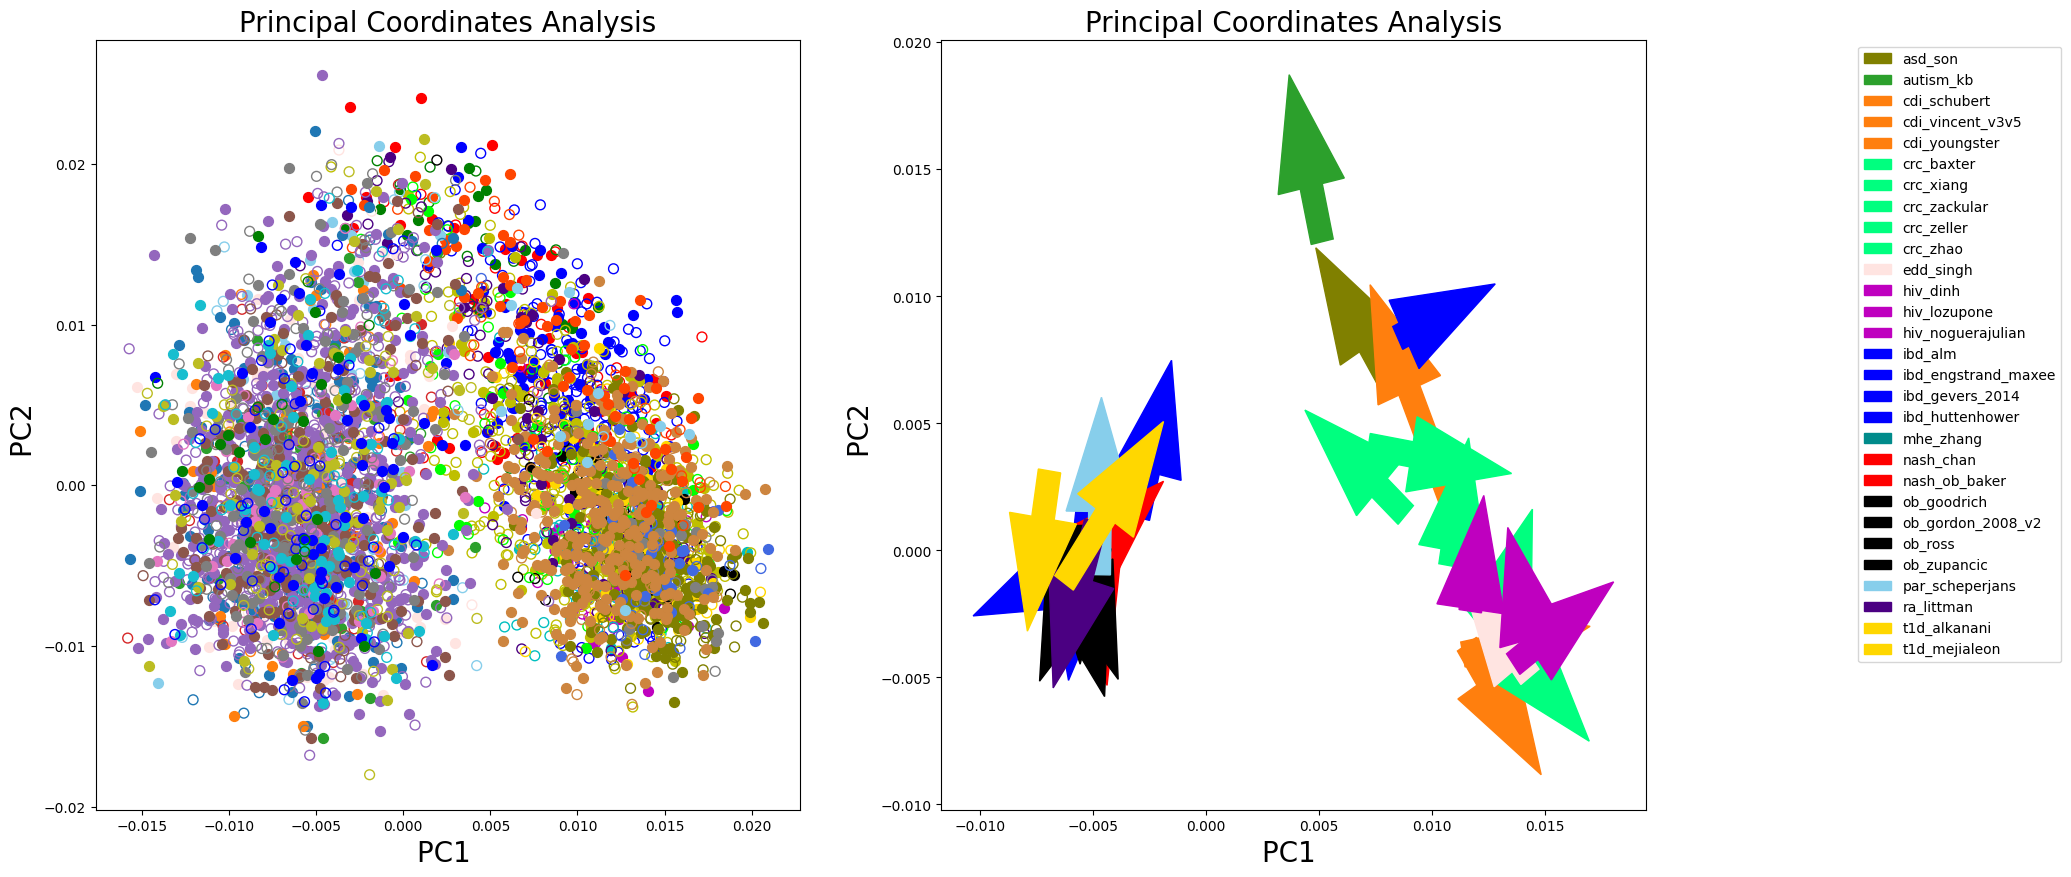

In [282]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,10))
polar_data_ra = plot_pca(components_r, all_genus, ax=ax1 ,pca=False,loadings=None, tops=tops_r, w=0.1, arrow=False)
polar_data_ra = plot_pca(components_r, all_genus, ax=ax2 ,pca=False,loadings=None, tops=tops_r, w=0.001)

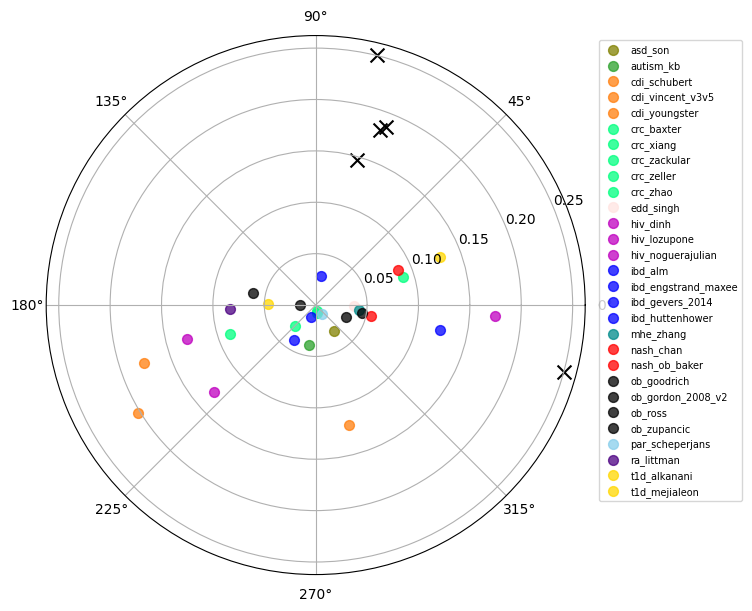

In [160]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(projection='polar')
angles, sizes = polar_data_ra
for angle,name,size in zip(angles,all_names,sizes):
    ax.scatter(angle, size, c=color_disease[data_map[name]], alpha=0.75, s=50)
for (i, arrow), index in zip(enumerate(loadings[-5:]),tops):
    ax.scatter(math.atan2(arrow[1], arrow[0]),min(math.sqrt((arrow[0])**2+(arrow[1])**2),0.25),  c='black', alpha=1, marker='x', s=100)
plt.legend(all_names,prop={'size': 7}, bbox_to_anchor=(1.3, 1))

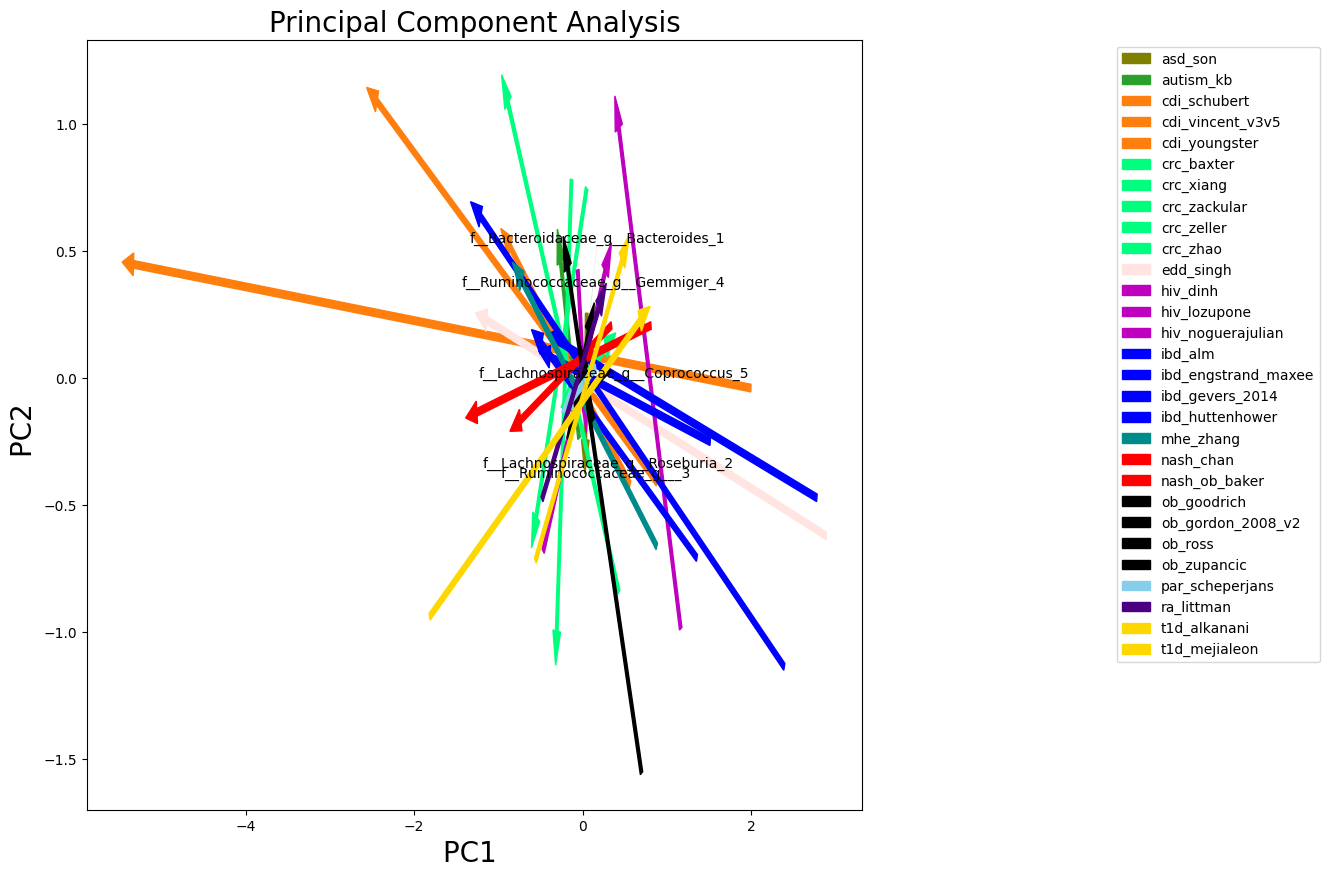

In [14]:
polar_data_combat = plot_pca(components_log, all_genus ,loadings_log, tops_log)

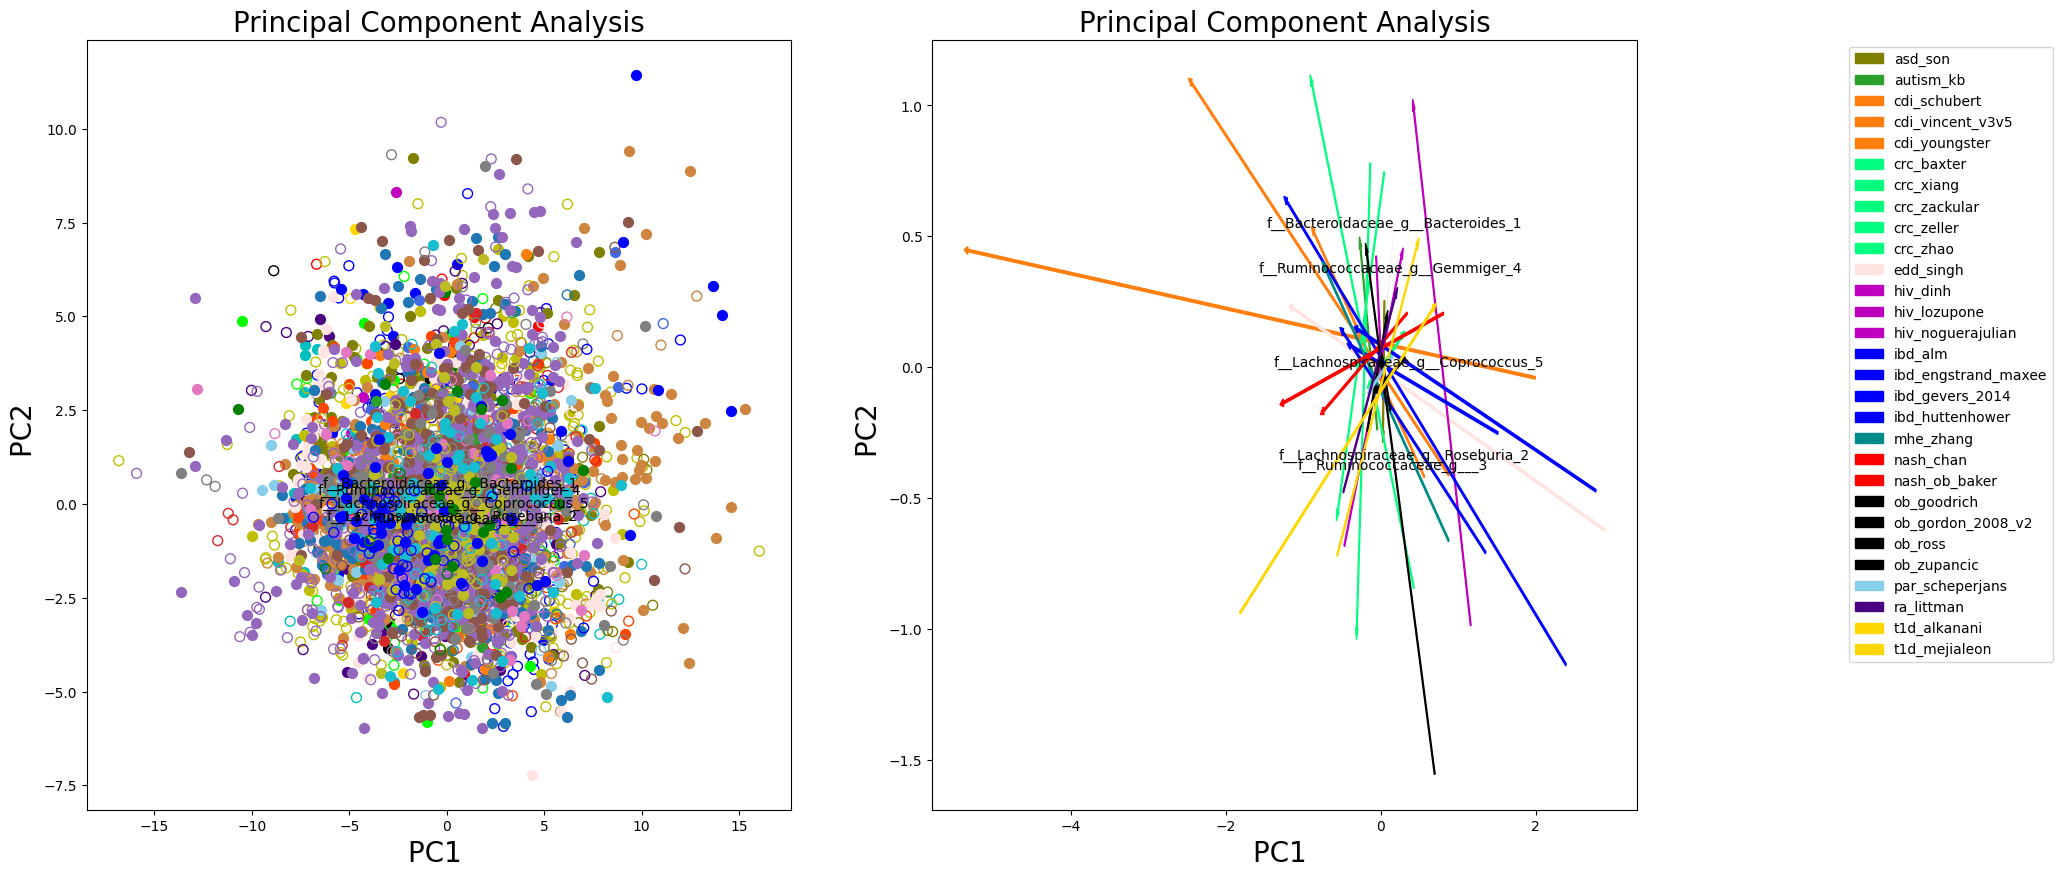

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,10))
polar_data_ra = plot_pca(components_log, all_genus, ax=ax1 ,loadings=loadings_log, tops=tops_log, w=0.01, arrow=False)
polar_data_combat = plot_pca(components_log, all_genus, ax=ax2 ,loadings=loadings_log, tops=tops_log, w=0.01)

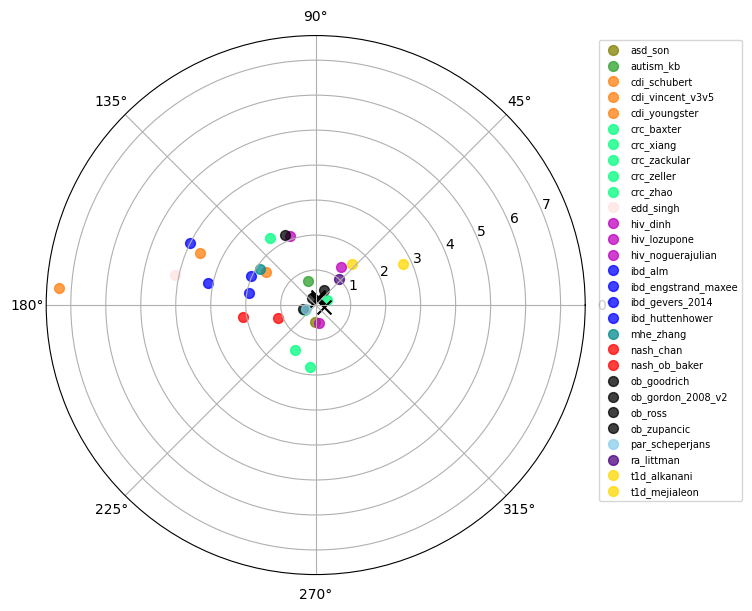

In [18]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(projection='polar')
angles, sizes = polar_data_combat
for angle,name,size in zip(angles,all_names,sizes):
    ax.scatter(angle, size, c=color_disease[data_map[name]], alpha=0.75, s=50)
for (i, arrow), index in zip(enumerate(loadings[-5:]),tops):
    ax.scatter(math.atan2(arrow[1], arrow[0]),min(math.sqrt((arrow[0])**2+(arrow[1])**2),0.25),  c='black', alpha=1, marker='x', s=100)
plt.legend(all_names,prop={'size': 7}, bbox_to_anchor=(1.3, 1))

Text(0.5, 1.0, 'batch correction polar similarity')

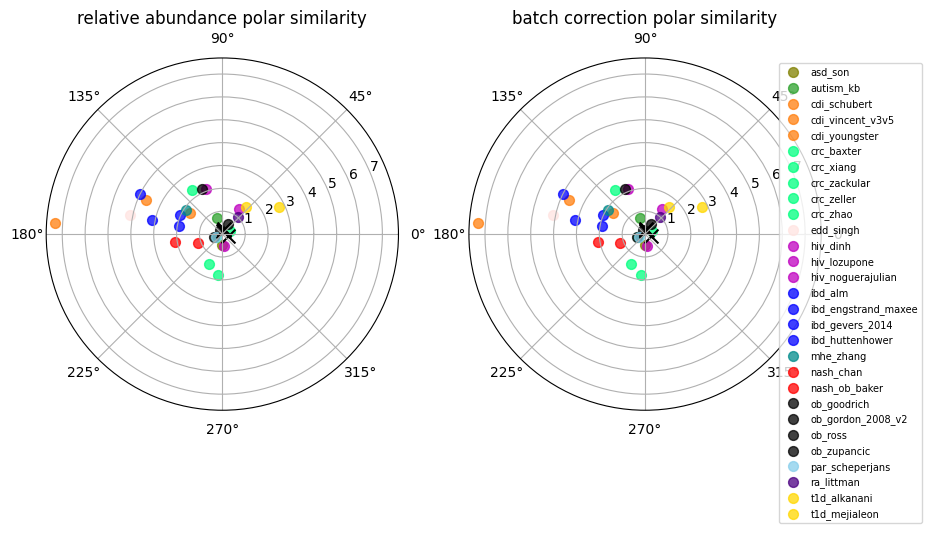

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, subplot_kw=dict(projection='polar'), figsize=(10,10))
angles, sizes = polar_data_ra
for angle,name,size in zip(angles,all_names,sizes):
    ax1.scatter(angle, size, c=color_disease[data_map[name]], alpha=0.75, s=50)
for (i, arrow), index in zip(enumerate(loadings[-5:]),tops):
    ax1.scatter(math.atan2(arrow[1], arrow[0]),min(math.sqrt((arrow[0])**2+(arrow[1])**2),0.25),  c='black', alpha=1, marker='x', s=100)
plt.legend(all_names,prop={'size': 7}, bbox_to_anchor=(1.3, 1))
angles, sizes = polar_data_combat
for angle,name,size in zip(angles,all_names,sizes):
    ax2.scatter(angle, size, c=color_disease[data_map[name]], alpha=0.75, s=50)
for (i, arrow), index in zip(enumerate(loadings[-5:]),tops):
    ax2.scatter(math.atan2(arrow[1], arrow[0]),min(math.sqrt((arrow[0])**2+(arrow[1])**2),0.25),  c='black', alpha=1, marker='x', s=100)
plt.legend(all_names,prop={'size': 7}, bbox_to_anchor=(1.3, 1))
ax1.set_title('relative abundance polar similarity')
ax2.set_title('batch correction polar similarity')

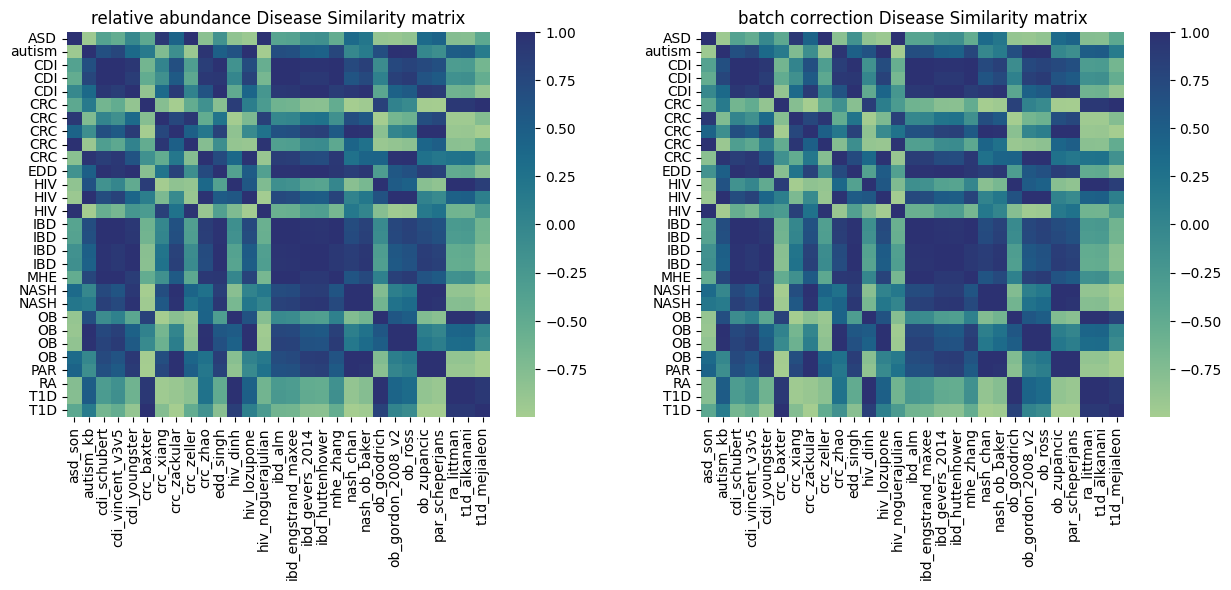

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,5))
angles, sizes = polar_data_ra
new_df_ra = pd.DataFrame({'angles': angles, 'length': sizes, 'names': np.array(all_names),'disease': np.array([data_map[name] for name in all_names])})
new_df_ra['similarity'] = [np.cos(new_df_ra['angles'][i]- new_df_ra['angles']) for i in range(len(new_df_ra))]
mat_ra = [np.array(np.cos(new_df_ra['angles'][i]-new_df_ra['angles'])) for i in range(len(new_df_ra))]
angles, sizes = polar_data_combat
new_df_combat = pd.DataFrame({'angles': angles, 'length': sizes, 'names': np.array(all_names),'disease': np.array([data_map[name] for name in all_names])})
new_df_combat['similarity'] = [np.cos(new_df_combat['angles'][i]- new_df_combat['angles']) for i in range(len(new_df_combat))]
mat_combat = [np.array(np.cos(new_df_combat['angles'][i]-new_df_combat['angles'])) for i in range(len(new_df_ra))]
n = len(mat_combat)
plt.xticks(range(n), all_names, rotation=90)
plt.yticks(range(n), all_names)
plot = seaborn.heatmap(mat_ra,xticklabels=all_names, yticklabels=[data_map[name] for name in all_names],cmap="crest", ax = ax1)
plot = seaborn.heatmap(mat_combat,xticklabels=all_names, yticklabels=[data_map[name] for name in all_names],cmap="crest", ax = ax2)
ax1.set_title('relative abundance Disease Similarity matrix')
ax2.set_title('batch correction Disease Similarity matrix')
plt.show()

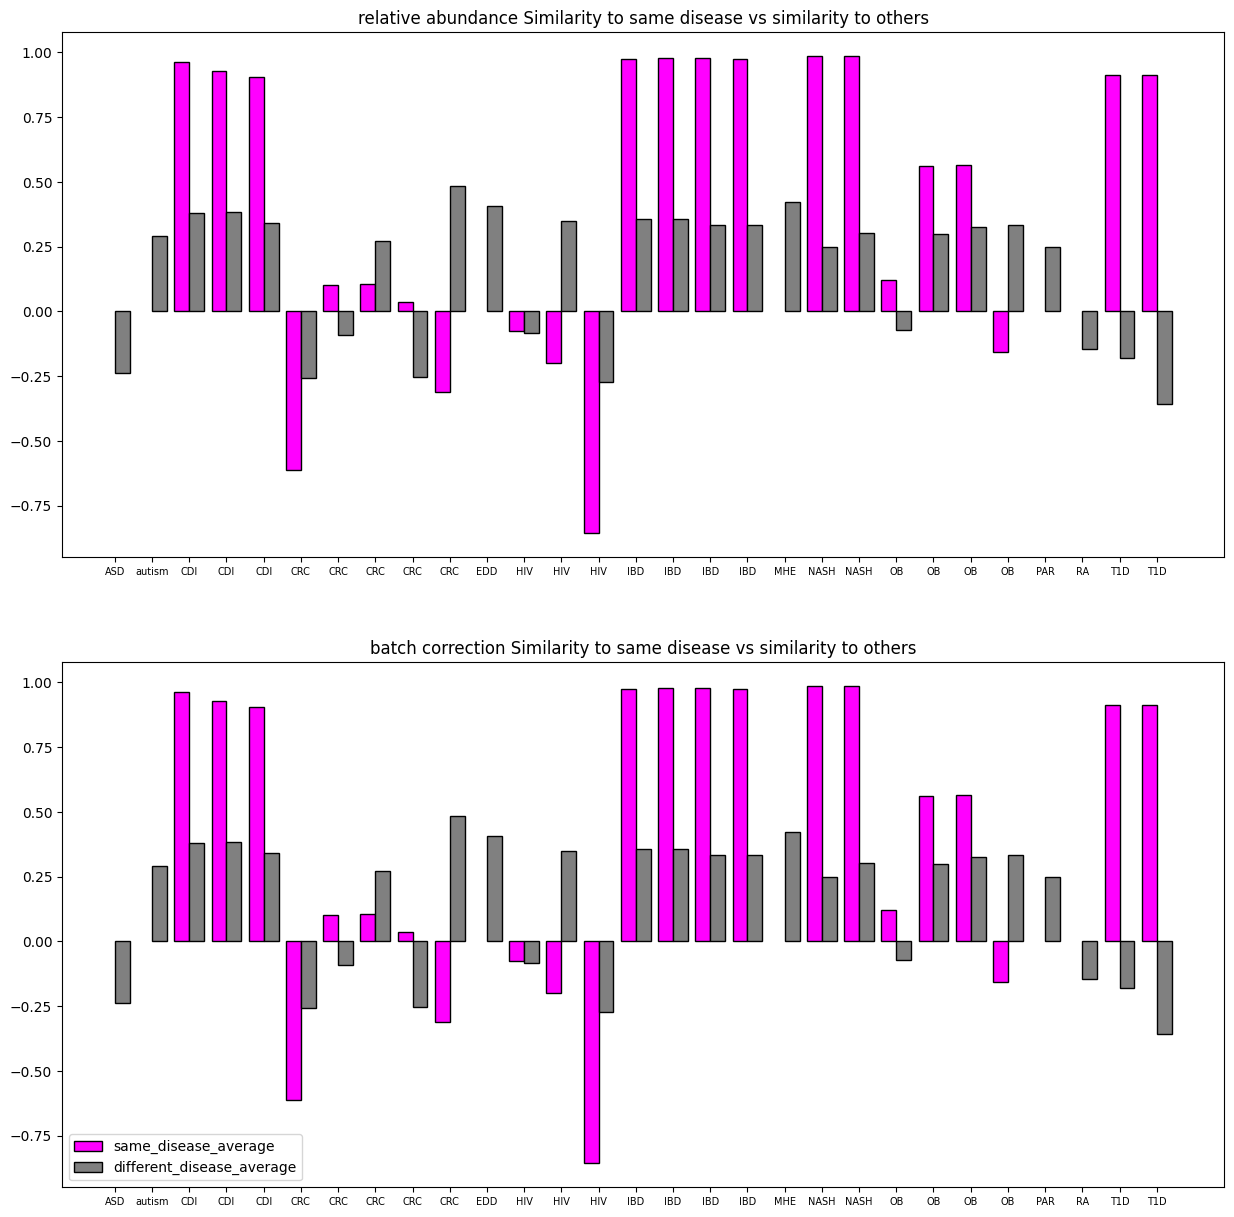

In [42]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (15,15))
indexes = [i for i in range(29) if i not in [0,1,10, 18, 25, 26]]
new_df_ra.loc[:,'different_disease'] = [sum((new_df_ra['similarity'][i][(new_df_ra['disease'][i] != new_df_ra['disease']) & (new_df_ra['names'][i] != new_df_ra['names'])]))/len(new_df_ra['similarity'][i][(new_df_ra['disease'][i] != new_df_ra['disease']) & (new_df_ra['names'][i] != new_df_ra['names'])]) for i in range(29)]
new_df_ra.loc[indexes,'same_disease'] = [sum((new_df_ra['similarity'][i][(new_df_ra['disease'][i] == new_df_ra['disease']) & (new_df_ra['names'][i] != new_df_ra['names'])]))/len(new_df_ra['similarity'][i][(new_df_ra['disease'][i] == new_df_ra['disease']) & (new_df_ra['names'][i] != new_df_ra['names'])]) for i in indexes]
new_df_combat.loc[:,'different_disease'] = [sum((new_df_combat['similarity'][i][(new_df_combat['disease'][i] != new_df_combat['disease']) & (new_df_combat['names'][i] != new_df_combat['names'])]))/len(new_df_combat['similarity'][i][(new_df_combat['disease'][i] != new_df_combat['disease']) & (new_df_combat['names'][i] != new_df_combat['names'])]) for i in range(29)]
new_df_combat.loc[indexes,'same_disease'] = [sum((new_df_combat['similarity'][i][(new_df_combat['disease'][i] == new_df_combat['disease']) & (new_df_combat['names'][i] != new_df_combat['names'])]))/len(new_df_combat['similarity'][i][(new_df_combat['disease'][i] == new_df_combat['disease']) & (new_df_combat['names'][i] != new_df_combat['names'])]) for i in indexes]

n= 29
r = np.arange(n)
width = 0.4
ax1.bar(r, new_df_ra.loc[:,'same_disease'], color = 'magenta',
        width = width, edgecolor = 'black',
        label='same_disease_average')
ax1.bar(r + width, new_df_ra.loc[:, 'different_disease'], color = 'grey',
        width = width, edgecolor = 'black',
        label='different_disease_average')
ax1.set_xticks(r + width/2,new_df_ra.loc[:,'disease'], size=7)
ax2.bar(r, new_df_combat.loc[:,'same_disease'], color = 'magenta',
        width = width, edgecolor = 'black',
        label='same_disease_average')
ax2.bar(r + width, new_df_combat.loc[:, 'different_disease'], color = 'grey',
        width = width, edgecolor = 'black',
        label='different_disease_average')

ax2.set_xticks(r + width/2,new_df_combat.loc[:,'disease'], size=7)

ax1.set_title('relative abundance Similarity to same disease vs similarity to others')
ax2.set_title('batch correction Similarity to same disease vs similarity to others')
plt.legend()

LEAVE ONE OUT DISEASE

In [25]:
relevant = new_df_combat.drop([0,1,10,18,25,26])

In [34]:
relevant['same_disease_score'] = (relevant['same_disease'] + 1)/2
relevant['different_disease_score'] = (relevant['different_disease'] + 1)/2
relevant['angle'] = relevant['angles']

In [36]:
display(relevant.loc[:,['names','disease', 'angle', 'length', 'same_disease_score', 'different_disease_score']])

,names,disease,angle,length,same_disease_score,different_disease_score
2,cdi_schubert,CDI,2.717603,3.643370,0.981123,0.690703
3,cdi_vincent_v3v5,CDI,2.561066,1.701195,0.964616,0.691515
4,cdi_youngster,CDI,3.075258,7.343500,0.951853,0.671577
5,crc_baxter,CRC,0.450616,0.350191,0.194659,0.372150
6,crc_xiang,CRC,-2.004438,1.424179,0.551104,0.455436
7,crc_zackular,CRC,-2.727023,0.324273,0.553142,0.635923
8,crc_zeller,CRC,-1.668748,1.785247,0.518338,0.373566
9,crc_zhao,CRC,2.170435,2.330973,0.344643,0.742783
11,hiv_dinh,HIV,0.981925,1.324700,0.463009,0.459287
12,hiv_lozupone,HIV,1.927719,2.102038,0.401150,0.673871


<AxesSubplot: xlabel='same_disease_score', ylabel='names'>

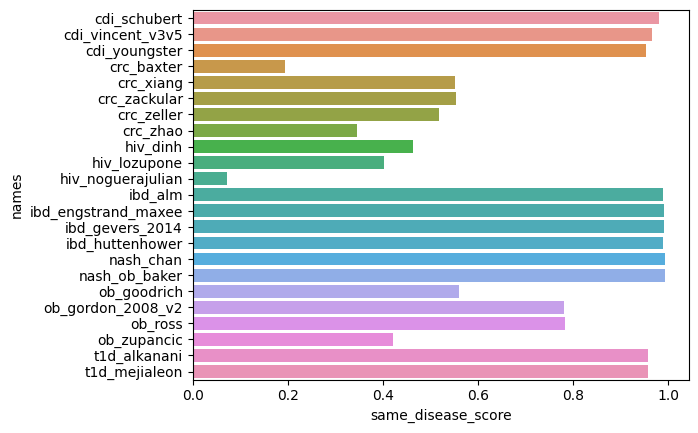

In [40]:
sns.barplot(relevant, x='same_disease_score', y = 'names', hue_order='disease', orient='h')

<AxesSubplot: xlabel='same_disease_score', ylabel='disease'>

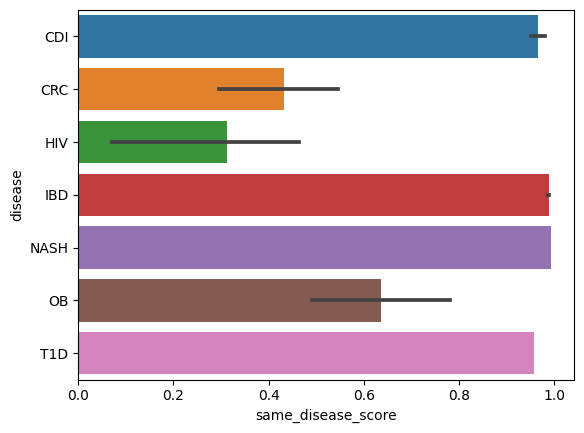

In [41]:
sns.barplot(relevant, x='same_disease_score', y = 'disease', orient='h')